# Public API Visualization Task

In this notebook we'll use a public API from this [repo](https://github.com/public-apis/public-apis) to visualize the data. The API we'll use is the [Weather API](https://github.com/robertoduessmann/weather-api). Assume that the resulting plot from this notebook is used in a presentation to the CEO of the company, but the meeting got postponed for a week and you need the new forecast now. 

If your notebook is reproducible, you do not mind this. 

## Getting the data

The weather API returns the forecast in the following schema
```{'temperature': '+9 °C',
 'wind': '7 km/h',
 'description': 'Sunny',
 'forecast': [{'day': '1', 'temperature': '+13 °C', 'wind': '9 km/h'},
  {'day': '2', 'temperature': '11 °C', 'wind': '9 km/h'},
  {'day': '3', 'temperature': '+8 °C', 'wind': '27 km/h'}]}

In [2]:
import requests
import json

In [1]:
api_url = 'https://goweather.herokuapp.com/weather/%s' # %s is a placeholder for the city name
cities = ['istanbul', 'izmir', 'ankara', 'bursa', 'antalya', 'konya', 'samsun', 'gaziantep'] # list of cities we have branches in

In [34]:
# city = 'istanbul'
# response = requests.get(api_url % city).json()
# print(response)
# temperature_forecasts = [day['temperature'] for day in response['forecast']]
# temperature_forecasts = [int(temperature[:-2]) for temperature in temperature_forecasts]

{'temperature': '+9 °C', 'wind': '7 km/h', 'description': 'Sunny', 'forecast': [{'day': '1', 'temperature': '+13 °C', 'wind': '9 km/h'}, {'day': '2', 'temperature': '11 °C', 'wind': '9 km/h'}, {'day': '3', 'temperature': '+8 °C', 'wind': '27 km/h'}]}


In [5]:
def get_3day_temperature_forecasts(city):
    response = requests.get(api_url % city).json()
    temperature_forecasts = [day['temperature'] for day in response['forecast']]
    temperature_forecasts = [int(temperature[:-2]) for temperature in temperature_forecasts]
    return temperature_forecasts

get_3day_temperature_forecasts('istanbul')

[13, 11, 8]

In [6]:
forecasts = {}
for city in cities:
    forecasts[city] = get_3day_temperature_forecasts(city)

In [7]:
forecasts

{'istanbul': [13, 11, 8],
 'izmir': [17, 14, 6],
 'ankara': [11, 12, 8],
 'bursa': [15, 9, 4],
 'antalya': [15, 12, 12],
 'konya': [11, 9, 7],
 'samsun': [13, 6, 6],
 'gaziantep': [10, 9, 9]}

## Visualize the forecast for the next 3 days.

In [8]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 679.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 446.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 538.0 kB/s eta 0:00:00a 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 104.0 kB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 426.7 kB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [13]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

In [18]:
# y = forecasts['istanbul']
# print(y)
# today = dt.today().isoformat()[:10]
# print(today)
# a_day = timedelta(days=1)

# x = [dt.today() + (1*a_day), dt.today() + (2*a_day), dt.today() + (3*a_day)]
# days = [day.isoformat()[:10] for day in x]
# print(days)

[13, 11, 8]
2023-03-15
['2023-03-16', '2023-03-17', '2023-03-18']


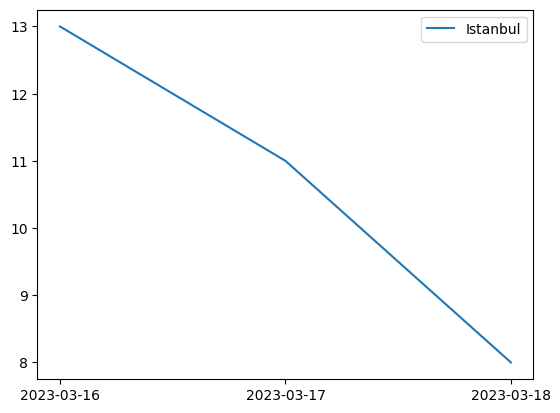

In [21]:
# plt.plot(days, y, label='Istanbul')
# plt.legend()
# plt.show()

/var/folders/rg/r1h2qhf502n6zsj0xdv9t3cw0000gn/T/ipykernel_20998/2146993038.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


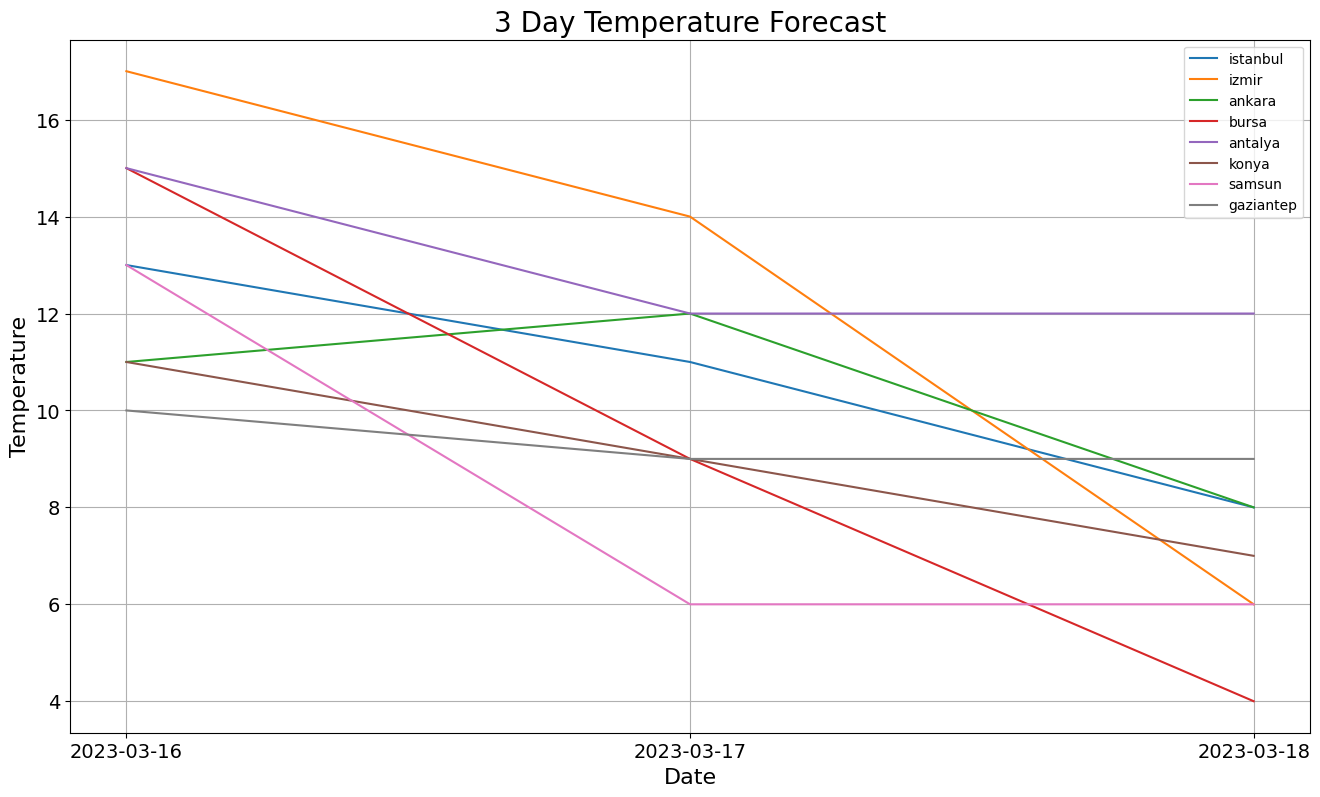

In [32]:
a_day = timedelta(days=1)
days = [dt.today() + (1*a_day), dt.today() + (2*a_day), dt.today() + (3*a_day)]
x = [day.isoformat()[:10] for day in days]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('3 Day Temperature Forecast', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Temperature', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)

for city, forecast in forecasts.items():
    ax.plot(x, forecast, label=city)

ax.legend()
fig.show()

saving this figure as a png file to add on the presentation

In [33]:
today = dt.today().isoformat()[:10]
fig.savefig(f'weather_forecasts_as_of_{today}.png')